<a href="https://colab.research.google.com/github/SumeetCEH/SumeetsAI/blob/main/Credit_Card_Fraud_Detection_using_ML%2CDL_and_GridSearchCV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using ML and DL and Grid Search CV


In [6]:
import pandas as pd


In [7]:
df = pd.read_csv('/content/creditcard1.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77333,57003,-1.565835,0.537575,3.284121,3.229021,-0.917761,2.016339,-1.157749,1.086392,0.234172,...,0.125678,1.072830,-0.229837,0.094444,0.215087,0.544487,0.271867,-0.089124,25.69,0.0
77334,57005,-0.710264,-0.095320,2.899716,0.718612,-0.501955,0.968641,-0.007123,0.308006,1.383339,...,0.069589,0.711129,-0.038570,0.088990,-0.282553,-0.448201,0.054450,-0.051693,65.00,0.0
77335,57005,0.875729,-0.658494,-0.798643,-0.889801,-0.205406,-1.093946,0.743501,-0.381269,0.405087,...,0.192299,0.161282,-0.451218,0.060376,0.885705,-0.477421,-0.036297,0.035704,235.53,0.0
77336,57006,-0.679923,1.074176,1.045563,1.100620,-0.764069,-1.048969,0.601586,0.283135,-0.674820,...,0.256539,0.475028,0.124473,0.886947,-0.327076,-0.362904,0.017048,0.109040,73.52,0.0
77337,57006,1.380239,-1.328341,1.488601,-1.259442,-2.253642,-0.193980,-1.799733,0.139147,-1.245753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    77338 non-null  int64  
 1   V1      77338 non-null  float64
 2   V2      77338 non-null  float64
 3   V3      77338 non-null  float64
 4   V4      77338 non-null  float64
 5   V5      77338 non-null  float64
 6   V6      77338 non-null  float64
 7   V7      77338 non-null  float64
 8   V8      77338 non-null  float64
 9   V9      77338 non-null  float64
 10  V10     77338 non-null  float64
 11  V11     77338 non-null  float64
 12  V12     77338 non-null  float64
 13  V13     77338 non-null  float64
 14  V14     77337 non-null  float64
 15  V15     77337 non-null  float64
 16  V16     77337 non-null  float64
 17  V17     77337 non-null  float64
 18  V18     77337 non-null  float64
 19  V19     77337 non-null  float64
 20  V20     77337 non-null  float64
 21  V21     77337 non-null  float64
 22

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,...,77337.000000,77337.000000,77337.000000,77337.000000,77337.000000,77337.000000,77337.000000,77337.000000,77337.000000,77337.000000
mean,36633.048243,-0.254918,-0.031977,0.678014,0.164544,-0.275915,0.096378,-0.114258,0.054293,-0.002388,...,-0.028664,-0.105409,-0.038736,0.007140,0.134606,0.025669,0.002190,0.002952,97.617764,0.002431
std,14986.790777,1.883504,1.670498,1.395670,1.369866,1.384600,1.304456,1.250692,1.231153,1.147883,...,0.737389,0.636245,0.624142,0.596273,0.439940,0.498373,0.388189,0.326392,270.498883,0.049245
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,30195.250000,-1.016589,-0.597243,0.187865,-0.726170,-0.893539,-0.641995,-0.604823,-0.141463,-0.681631,...,-0.224615,-0.523942,-0.178388,-0.323839,-0.128938,-0.327346,-0.063209,-0.005750,7.680000,0.000000
50%,39488.000000,-0.248318,0.070092,0.765732,0.183869,-0.308220,-0.153551,-0.074168,0.068582,-0.084259,...,-0.058979,-0.079854,-0.050419,0.063800,0.172985,-0.073324,0.009347,0.022845,26.750000,0.000000
75%,48186.000000,1.153837,0.723977,1.396222,1.046651,0.261079,0.490920,0.417033,0.347917,0.634360,...,0.117070,0.309331,0.080314,0.404907,0.421716,0.306762,0.082399,0.076002,89.000000,0.000000
max,57006.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [12]:
df.size

2397478

In [13]:
df.index

RangeIndex(start=0, stop=77338, step=1)

In [14]:
df.nunique()

,0
Time,36372
V1,75641
V2,75641
V3,75641
V4,75641
V5,75641
V6,75641
V7,75641
V8,75641
V9,75641


In [15]:
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [16]:
import matplotlib.pyplot as plt


In [17]:
import seaborn as sns

<Axes: xlabel='Amount', ylabel='Count'>

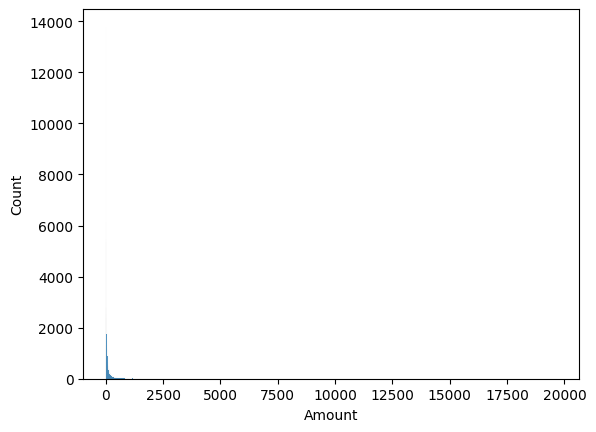

In [18]:
sns.histplot(df['Amount'])

<Axes: ylabel='Amount'>

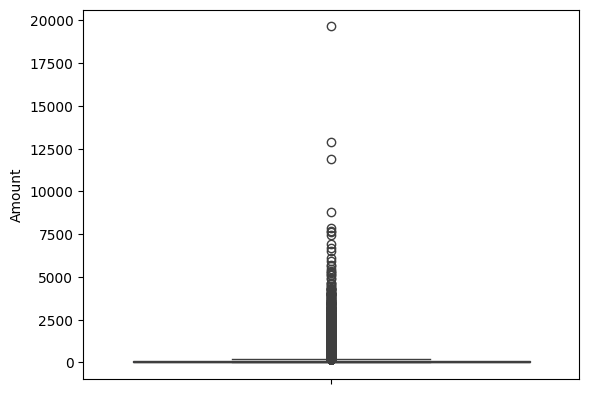

In [19]:
sns.boxplot(df['Amount'])

In [20]:
df['Class'].value_counts()

,count
Class,
0.0,77149
1.0,188


In [21]:
df.shape

(77338, 31)

In [22]:
label_df=df['Class'].value_counts().index

In [23]:
values_df=df['Class'].value_counts().values

([<matplotlib.patches.Wedge at 0x79b4d426b010>,
 [Text(-1.0999679226163712, 0.008400548495495302, '0.0'),
  Text(1.0999679233507662, -0.00840045233324156, '1.0')],
 [Text(-0.5999825032452933, 0.004582117361179255, '99.76%'),
  Text(0.5999825036458724, -0.004582064909040851, '0.24%')])

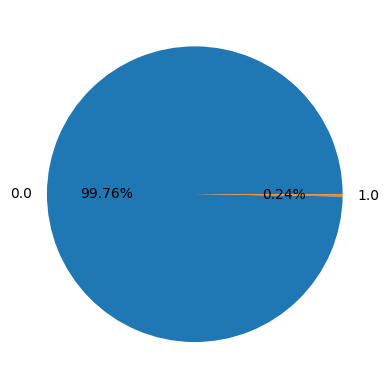

In [24]:
plt.pie(values_df,labels=label_df,autopct='%1.2f%%')

In [25]:
df.drop('Time',axis=1,inplace=True)

In [26]:
df.groupby('Class')['Amount'].mean()

,Amount
Class,
0.0,97.625867
1.0,94.292500


In [27]:
label_df=df['Class'].value_counts().index

In [28]:
values_df=df['Class'].value_counts().values

([<matplotlib.patches.Wedge at 0x79b4d429dd10>,
 [Text(-1.0999679226163712, 0.008400548495495302, '0.0'),
  Text(1.0999679233507662, -0.00840045233324156, '1.0')],
 [Text(-0.5999825032452933, 0.004582117361179255, '99.76%'),
  Text(0.5999825036458724, -0.004582064909040851, '0.24%')])

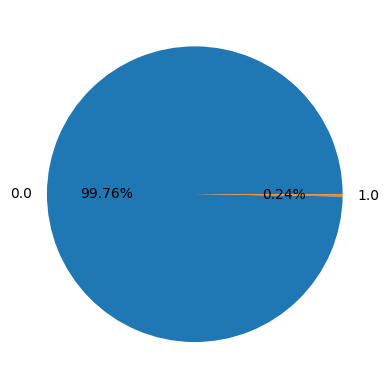

In [29]:
plt.pie(labels=label_df,x=values_df,autopct='%1.2f%%')

In [30]:
df.groupby('Class').size()

,0
Class,
0.0,77149
1.0,188


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm=SMOTE(random_state=42)

In [33]:
df=df.dropna()


In [34]:
X=df.drop('Class',axis=1)

In [35]:
y=df['Class']

In [36]:
X,y=sm.fit_resample(X,y)

In [37]:
X.shape

(154298, 29)

In [38]:
y.shape

(154298,)

In [39]:
y.value_counts()

,count
Class,
0.0,77149
1.0,77149


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
X_train.shape

(103379, 29)

In [43]:
y_train.shape

(103379,)

In [44]:
X_test.shape

(50919, 29)

In [45]:
y_test.shape

(50919,)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
#rfc=RandomForestClassifier()

In [48]:
#rfc.fit(X_train,y_train)

In [49]:
#rfc.predict(X_test)

In [50]:
#y_pred=rfc.predict(X_test)

In [51]:
#from sklearn.metrics import accuracy_score

In [52]:
#accuracy_score(y_test,y_pred)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
neigh=KNeighborsClassifier(n_neighbors=5)

In [55]:
#neigh.fit(X_train,y_train)

In [56]:
#y_pred=neigh.predict(X_test)

In [57]:
#from sklearn.metrics import confusion_matrix

In [58]:
#confusion_matrix(y_test,y_pred)

In [59]:
from sklearn.metrics import classification_report

In [61]:
#classification_report(y_test,y_pred)

In [63]:
#accuracy_score(y_test,y_pred)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr=LogisticRegression()

In [66]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred=lr.predict(X_test)

In [69]:
#accuracy_score(y_test,y_pred)

**DEEP LEARNING**


In [70]:
import keras
print(keras.__version__)

3.8.0


In [71]:
model = keras.Sequential()

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154293,-3.332320,3.871174,-4.554399,5.454465,-3.047929,-1.462104,-5.982689,1.852220,-4.880600,-6.532711,...,0.885490,0.947474,-0.444500,0.033838,-0.113382,-0.459368,-0.110093,1.170234,0.633430,0.982013
154294,-3.691568,-1.007943,-0.472766,2.083991,0.133611,-1.049984,-1.062192,-1.030329,-0.298385,-1.526682,...,-1.999939,0.785626,-0.095705,-0.230293,0.322882,-0.194052,-0.330821,1.058224,-0.035708,336.898063
154295,-18.662598,11.658230,-21.549432,6.048213,-14.554802,-4.168232,-14.954909,12.546565,-4.043784,-9.017529,...,1.579277,1.742365,-1.270749,-0.438234,0.098449,1.330034,-0.218484,1.623817,0.481058,99.990000
154296,-4.406576,8.401009,-15.242976,10.322482,-4.156754,-3.283067,-10.585193,4.820727,-5.701271,-11.758525,...,1.422455,1.983154,0.241627,0.517063,-1.201196,-0.492055,0.638040,1.617544,0.722511,1.000000


In [74]:
model.add(
    keras.Input(
        shape=(29,),
    batch_size=32,))

In [75]:
model.add(
    keras.layers.Dense(units=32,activation='relu')
)

In [76]:
model.add(
    keras.layers.Dense(units=64,activation='relu')
)

In [77]:
model.add(
    keras.layers.Dense(units=1,activation='sigmoid')
)

In [78]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [79]:
callback=keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    verbose=0,
    restore_best_weights=True
)

In [82]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9399 - loss: 0.2530 - val_accuracy: 0.9961 - val_loss: 0.0263
Epoch 2/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9959 - loss: 0.0377 - val_accuracy: 0.9979 - val_loss: 0.0112
Epoch 3/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9973 - loss: 0.0192 - val_accuracy: 0.9936 - val_loss: 0.0805
Epoch 4/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9975 - loss: 0.0269 - val_accuracy: 0.9945 - val_loss: 0.0335
Epoch 5/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9984 - loss: 0.0103 - val_accuracy: 0.9987 - val_loss: 0.0073
Epoch 6/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9990 - loss: 0.0059 - val_accuracy: 0.9986 - val_loss: 0.0064
Epoch 7/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9976 - val_loss: 0.0098
Epoch 8/100
3231/3231 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9982 -

In [83]:
model.evaluate(X_test,y_test)

1592/1592 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9995 - loss: 0.0029


[0.0032706891652196646, 0.9994304776191711]

**GRID SEARCH CV**

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
param_grid={
    'n_estimators': [100, 200],              # Number of trees
    'max_depth': [None, 10, 20],              # Maximum depth of tree
}

In [87]:
rfc=RandomForestClassifier()

In [90]:
model=GridSearchCV(rfc,param_grid,cv=5,n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # impurity function
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
model=GridSearchCV(dtc,param_grid,cv=5,n_jobs=-1)